In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 2 Initial sample of events
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/InitialSampleOfEvents/'

## numbers 

In [3]:
# from python scripts/count_events_and_POT.py
# <prodgenie_bnb_nu_uboone_overlay_mcc8_reco2>
# <prodgenie_bnb_nu_cosmic_uboone_mcc8.2_reco2>
Nevents = dict({'events MC-bnb/DATA-Cosmic':96200
                ,'POT MC-bnb/DATA-Cosmic':9.71687e+19
                ,'events MC-bnb/DATA-cosmic':358800                 
                ,'POT MC-bnb/DATA-Cosmic':3.61901e+20
               })
# -- - -- -- - -- - -- -- - -- -- - -- - -- -- -- -- - -- --- - -- -- --- 

# µp-events: general features
### To this end, we collect all CC events in which at least one proton was produced together with the muon

In [4]:
mupGENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIEmup_MCC8_MC_BNB_extBNB.csv')
print len(mupGENIEall),'total mu-p pairs in GENIE'
mupGENIE_FV = sample_in_FV(mupGENIEall)
print len(mupGENIE_FV),'total mu-p pairs in GENIE in FV'

50751 total mu-p pairs in GENIE
11245 total mu-p pairs in GENIE in FV


In [5]:
mupGENIEtypes = ['IsCC_1p_200MeVc'        ,'IsVertexContained','IsMuonReconstructed' ,'IsProtonReconstructed','IsVertexReconstructed' ]
mupGENIElabels= ['1$\\mu$, at least 1$p>200$ MeV/c', '$\\nu$-interaction contained in FV','$\\mu$ reconstructed','$p$ reconstructed'    ,'$\\mu,p$ reconstructed']
mupGENIEcolors= ['blue'                   , 'red'             , 'green'              , 'black'               , 'purple']
mupGENIEsamples=[]

In [6]:
mupGENIE=dict()
for pair_type in mupGENIEtypes:
    mupGENIE[pair_type] = mupGENIEall[mupGENIEall[pair_type]==True]
    mupGENIEsamples.append(mupGENIE[pair_type])
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(mupGENIEall))+'%'
# events in which the muon was detected and the proton was undetected
mupGENIE['pUnreconstructed'] = mupGENIEall[(mupGENIEall['IsVertexContained']==True)
                                           &(mupGENIEall['IsProtonReconstructed']==False)]  
print len(mupGENIE['pUnreconstructed']),'are pUnreconstructed, %.1f'%(100.*float(len(mupGENIE['pUnreconstructed']))/len(mupGENIEall))+'%'
mupGENIE['muReconstructed_pUnreconstructed'] = mupGENIEall[(mupGENIEall['IsVertexContained']==True)
                                                           &(mupGENIEall['IsMuonReconstructed']==True)
                                                           &(mupGENIEall['IsProtonReconstructed']==False)]    
print len(mupGENIE['muReconstructed_pUnreconstructed']),'are muReconstructed_pUnreconstructed, %.1f'%(100.*float(len(mupGENIE['muReconstructed_pUnreconstructed']))/len(mupGENIEall))+'%'

50751 are IsCC_1p_200MeVc, 100.0%
24867 are IsVertexContained, 49.0%
18070 are IsMuonReconstructed, 35.6%
9139 are IsProtonReconstructed, 18.0%
7563 are IsVertexReconstructed, 14.9%
15728 are pUnreconstructed, 31.0%
10507 are muReconstructed_pUnreconstructed, 20.7%


93.7183503773 %


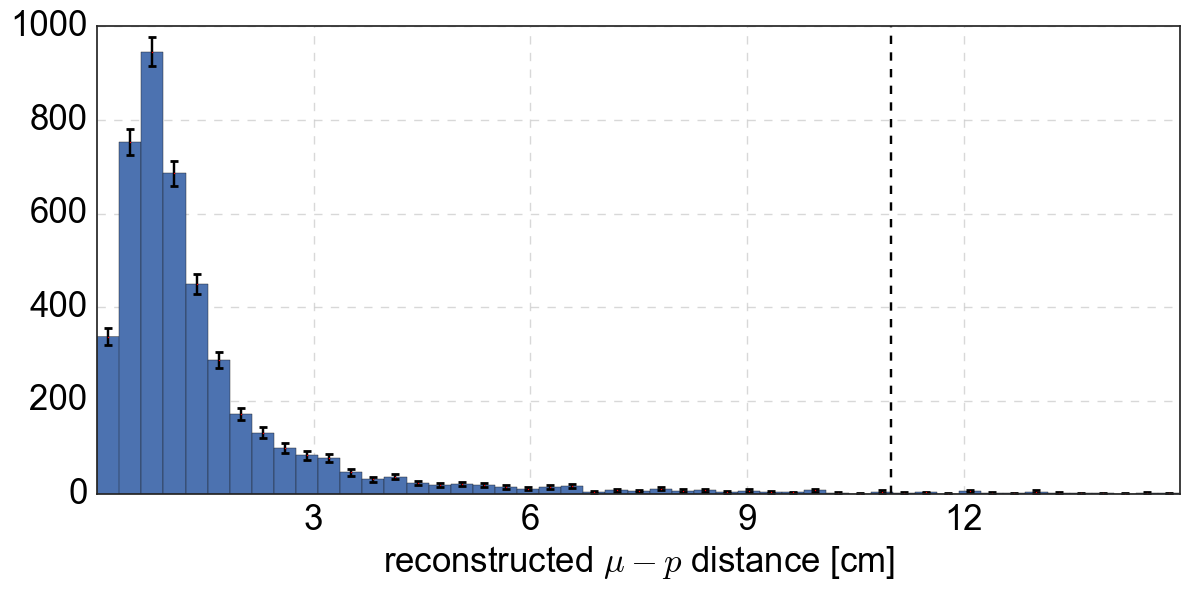

In [7]:
# fig:mup_distance
x = mupGENIE['IsCC_1p_200MeVc']['distance']
fig,ax=plt.subplots(figsize=(12,6))
h,bins,_=ax.hist(x,bins=np.linspace(0,15,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , '', fontsize=25 ,xticks=[3,6,9,12])
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
plt.savefig(figures_path+'mup_distance.pdf')
# how many of the µp pairs are retained for a cut < 11 cm?
print 100.*float(len(mupGENIE['IsCC_1p_200MeVc'][mupGENIE['IsCC_1p_200MeVc']['distance']<11]))/len(mupGENIE['IsCC_1p_200MeVc']),'%'

In [8]:
Ncontained = len(mupGENIE['IsVertexContained'])
for pair_type,label in zip(['IsVertexContained','IsMuonReconstructed' ,'IsVertexReconstructed' ],
                           ['CC$N_{p}$ vertex  with $N_{p}>0$ contained in (active volume of) the detector'
                            ,'\muon\ track reconstructed and contained in FV'
                            ,'\muon\ and at least one p tracks reconstructed and contained in FV']):
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+label+', %.1f'%(100.*float(Ntype)/Ncontained)+'%'

24867 are CC$N_{p}$ vertex  with $N_{p}>0$ contained in (active volume of) the detector, 100.0%
18070 are \muon\ track reconstructed and contained in FV, 72.7%
7563 are \muon\ and at least one p tracks reconstructed and contained in FV, 30.4%


## un-reconstructed events

In [9]:
## ~50% of the µp interactions are contained in the detector
### in ~70% out of which, the µ was reconstructed (not necessarily contained)
### however only in ~ 35% of which, the proton tracks are reconstructed - where are all the unreconstructed protons?

In [10]:
def plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=1,bins=np.linspace(0,180,45),xticks=np.linspace(0,180,7)):
    fig,ax=plt.subplots(figsize=(12,6))
    for gtype,label,color in zip(['IsMuonReconstructed','IsProtonReconstructed']#,'pUnreconstructed']
                             ,['all protons','proton reconstructed']#,'proton not-reconstructed']
                             ,['black','royalblue','salmon']):
        x = mul*mupGENIE[gtype][var]
        h , edges = np.histogram(x,bins=bins); mid = 0.5*(bins[1:] + bins[:-1]) 
        y = h.astype(float)# /len(x)
        yerr=1./np.sqrt(h)#/len(x)
        ax.errorbar( mid, y, yerr=yerr, xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
    
    set_axes(ax,xlabel , 'counts', fontsize=25,xticks=xticks)
    ax.legend(loc='upper right',fontsize=25,markerscale=2.)
    ax.grid(linestyle='--',alpha=0.5)
    plt.tight_layout()
    plt.savefig(figures_path+'ProtonRecoUnreco_'+var+'.pdf')

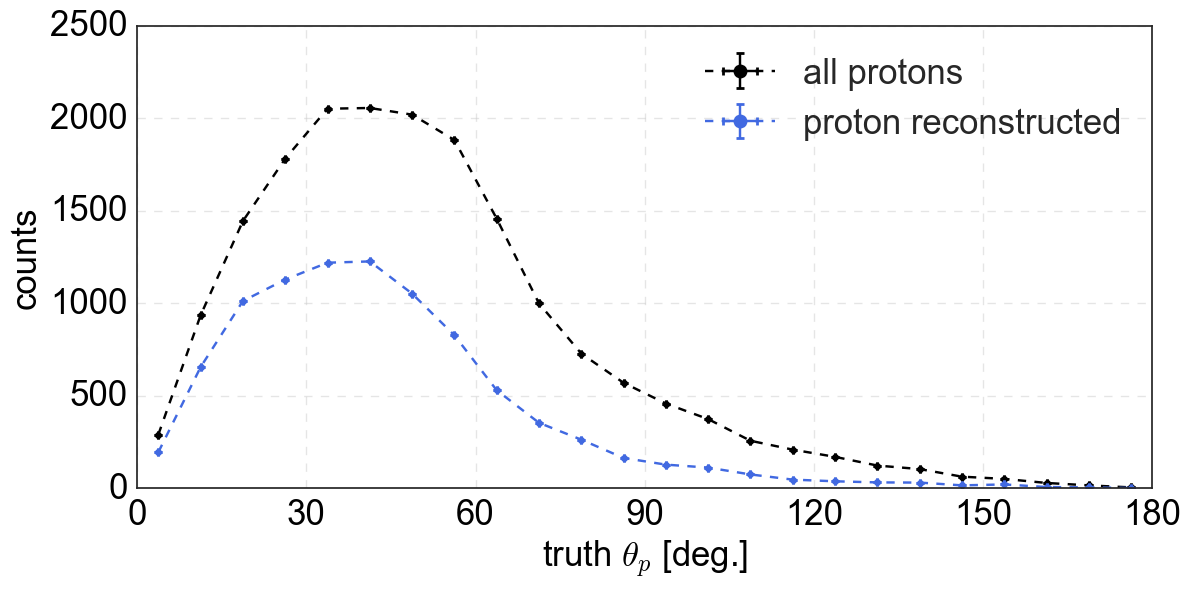

In [11]:
plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]'
                        ,mul=180./np.pi,bins=np.linspace(0,180,25),xticks=np.linspace(0,180,7))

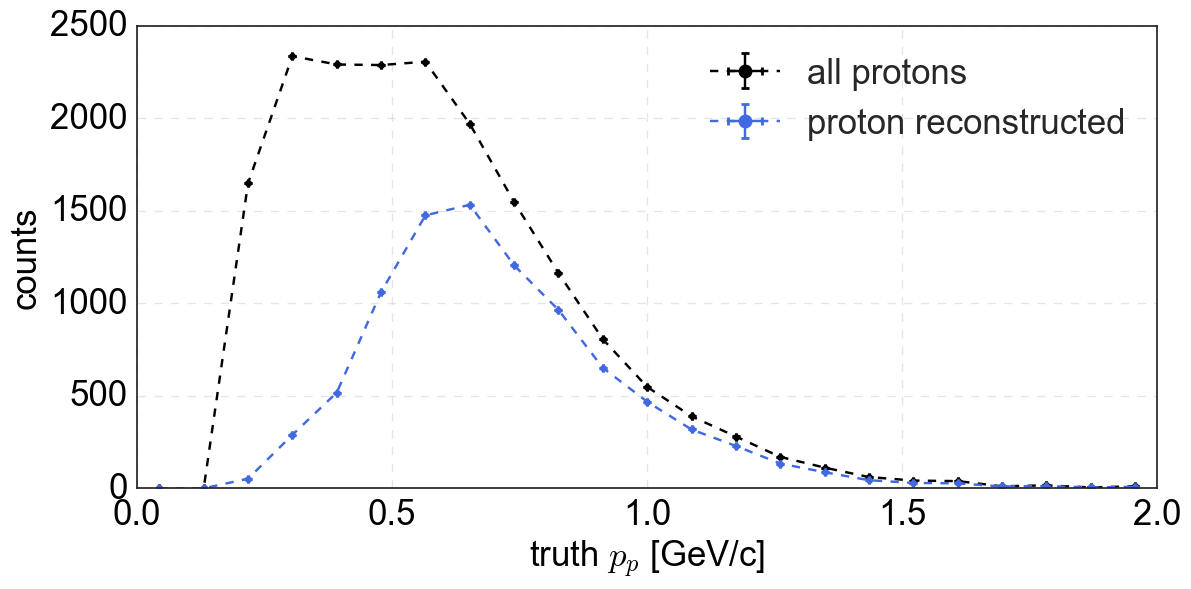

In [12]:
plot_proton_reco_unreco(var='truth_Pp',xlabel='truth $p_{p}$ [GeV/c]',bins=np.linspace(0,2,24),xticks=np.linspace(0,2,5))

# pairs of tracks at close proximity

In [13]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [14]:
MCbnbMCcosmicPairsFV, MCbnbMCcosmicSamples = load_MCbnbMCcosmicSamples()

139258 pairs from MC-BNB + cosmic MC overlay
96025 pairs in FV
3814 are 1mu-1p, 4.0%
4001 are other pairs, 4.2%
22562 are cosmic, 23.5%
--------------------------------------------------------------
1234 are CC 1p 0pi, 1.3%


## # 2TracksClustersContributions

In [15]:
print "copy to"
print "# tab:2TracksClustersContributions (InitialSampleOfEvents.tex)"
print 

for pairsFV,samples in zip([MCbnbDATAcosmicPairsFV]
                           ,[MCbnbDATAcosmicSamples]):
    print "				description				 							& number 	& fraction\
    \\tabularnewline"
    print " 				\hline \hline "
#print "				total number of pairs  				& %d"%len(pairs)+"  		& -\\tabularnewline \hline "
    print "				total number of pairs contained in FV  	& %d"%len(pairsFV)+"  		& 100\%\
    \\tabularnewline \hline"
    print "				\hline \hline"
    print "				\\textcolor{teal}{\mup\ pairs}\
			& \\textcolor{teal}{"+"%d"%len(samples['1mu-1p'])+"}\
	& \\textcolor{teal}{"+"%.1f"%(100.*float(len(samples['1mu-1p']))/len(pairsFV))+"\%"+"} \\tabularnewline \hline\ "
    print "				\\textcolor{red}{other pairs (non \mup)}\
	& \\textcolor{red}{"+"%d"%len(samples['other pairs'])+"}\
	& \\textcolor{red}{"+"%.1f"%(100.*float(len(samples['other pairs']))/len(pairsFV))+"\%"+"} \\tabularnewline \hline"
    print "				\\textcolor{orange}{cosmic pairs}\
		& \\textcolor{orange}{"+"%d"%len(samples['cosmic'])+"}\
	& \\textcolor{orange}{"+"%.1f"%(100.*float(len(samples['cosmic']))/len(pairsFV))+"\%"+"} \\tabularnewline \hline \hline "
    print "				\\textcolor{blue}{true \CCIpOpi}\
			& \\textcolor{blue}{"+"%d"%len(samples['CC 1p 0pi'])+"}\
	& \\textcolor{blue}{"+"%.1f"%(100.*float(len(samples['CC 1p 0pi']))/len(pairsFV))+"\%"+"}"
    print "				\\tabularnewline \hline"
    print 

copy to
# tab:2TracksClustersContributions (InitialSampleOfEvents.tex)

				description				 							& number 	& fraction    \tabularnewline
 				\hline \hline 
				total number of pairs contained in FV  	& 30377  		& 100\%    \tabularnewline \hline
				\hline \hline
				\textcolor{teal}{\mup\ pairs}			& \textcolor{teal}{3814}	& \textcolor{teal}{12.6\%} \tabularnewline \hline\ 
				\textcolor{red}{other pairs (non \mup)}	& \textcolor{red}{4001}	& \textcolor{red}{13.2\%} \tabularnewline \hline
				\textcolor{orange}{cosmic pairs}		& \textcolor{orange}{22562}	& \textcolor{orange}{74.3\%} \tabularnewline \hline \hline 
				\textcolor{blue}{true \CCIpOpi}			& \textcolor{blue}{1234}	& \textcolor{blue}{4.1\%}
				\tabularnewline \hline



## other-pairs (non 1µ-1p) contributions
## # fig:pieChartBackgroundNon1mu1p

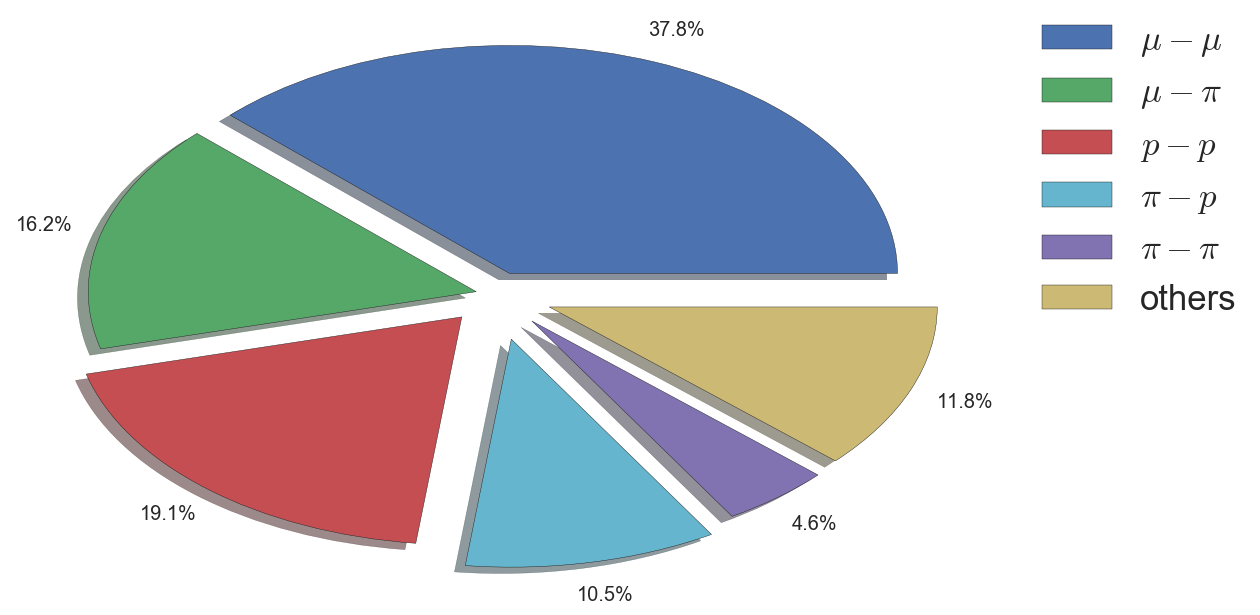

In [16]:
samples = MCbnbDATAcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs_labels       = ['$\mu-\mu$','$\mu-\pi$','$p-p$'    ,'$\pi-p$' ,'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=1.15,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'pieChartOtherPairs.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

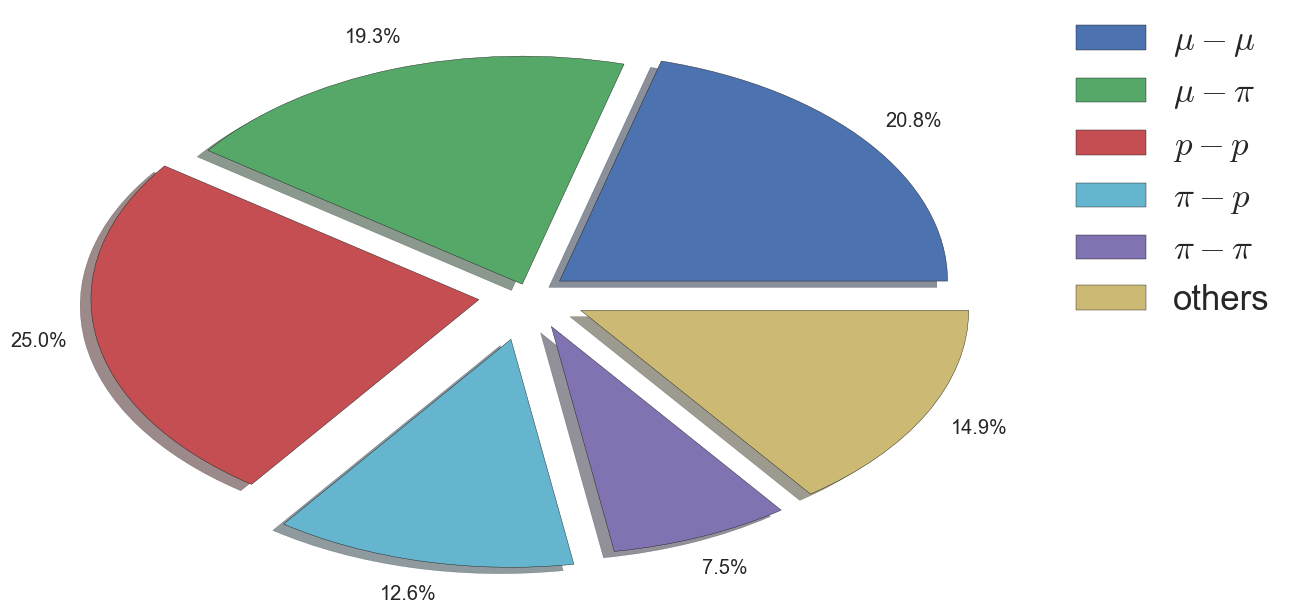

In [17]:
samples = MCbnbMCcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs_labels       = ['$\mu-\mu$','$\mu-\pi$','$p-p$'    ,'$\pi-p$' ,'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=1.15,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()

### Anne' comment no.7: what is the source of µµ events? is this broken tracks?
In order to answer, we plot the opening angle
#### # fig:uuPairs_opening_angle

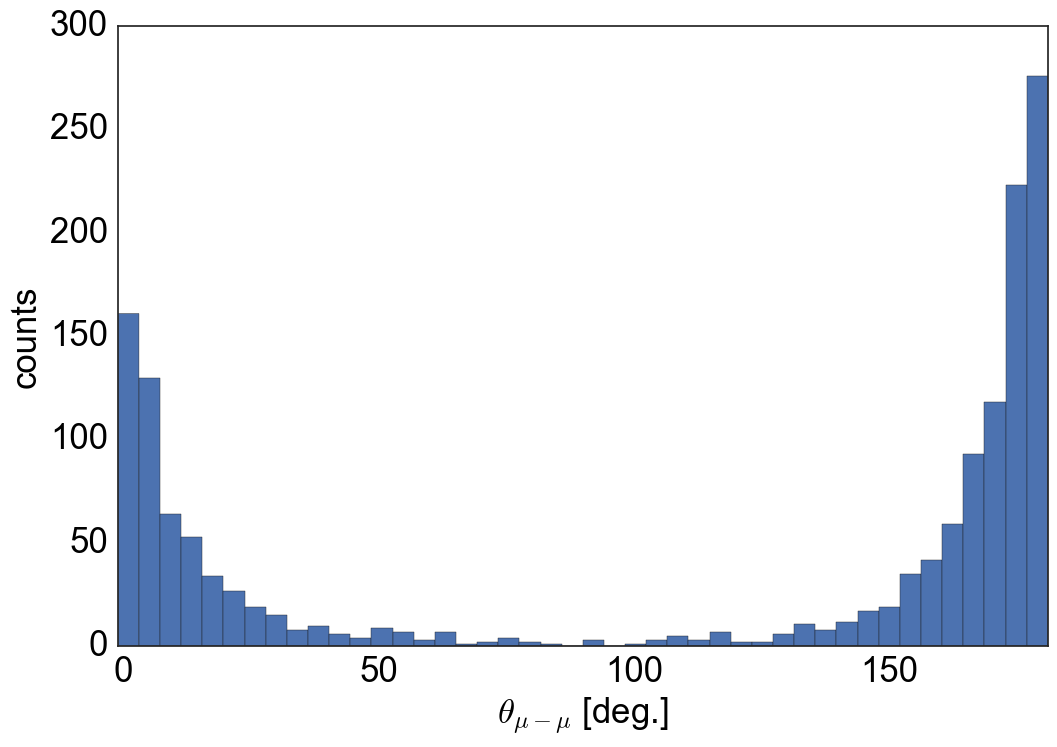

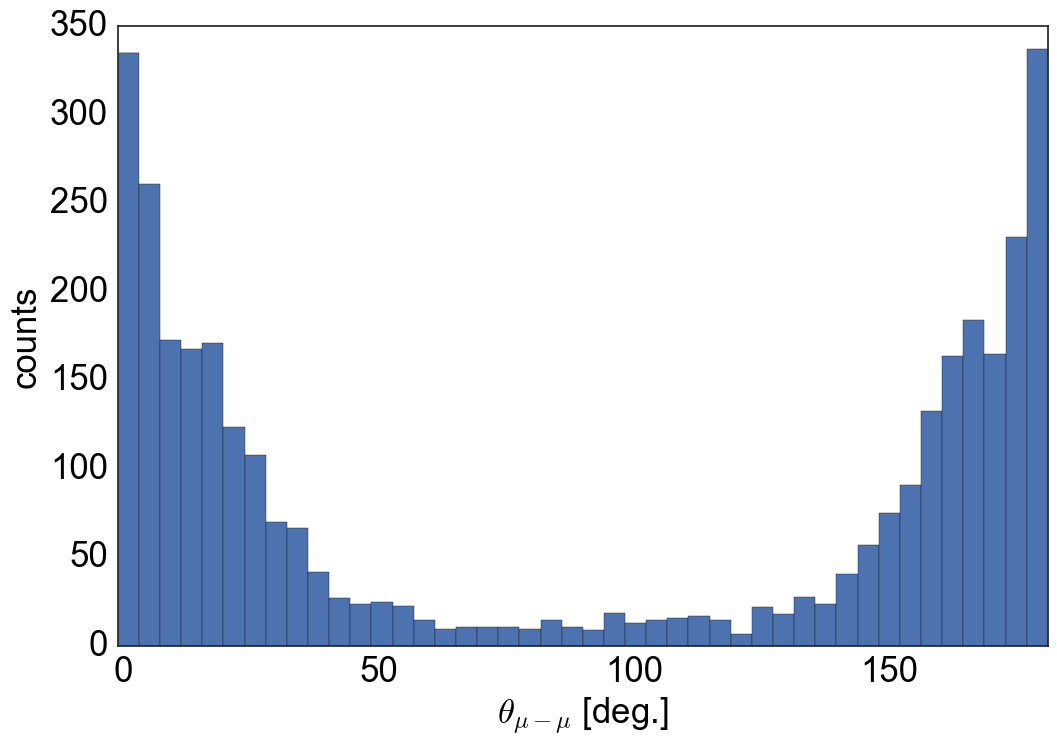

In [19]:
samples = MCbnbDATAcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs['mu-mu'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (13*13)]
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(other_pairs['mu-mu']['theta_12'],bins=np.linspace(-1,181,45));
ax.set_xlim(-1,181);
set_axes(ax,'$\\theta_{\\mu-\\mu}$ [deg.]','counts')
plt.savefig(figures_path+'uuPairs_opening_angle.pdf')

samples = MCbnbMCcosmicSamples
all_other_pairs = samples['other pairs']
other_pairs['mu-mu'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (13*13)]
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(other_pairs['mu-mu']['theta_12'],bins=np.linspace(-1,181,45));
ax.set_xlim(-1,181);
set_axes(ax,'$\\theta_{\\mu-\\mu}$ [deg.]','counts')

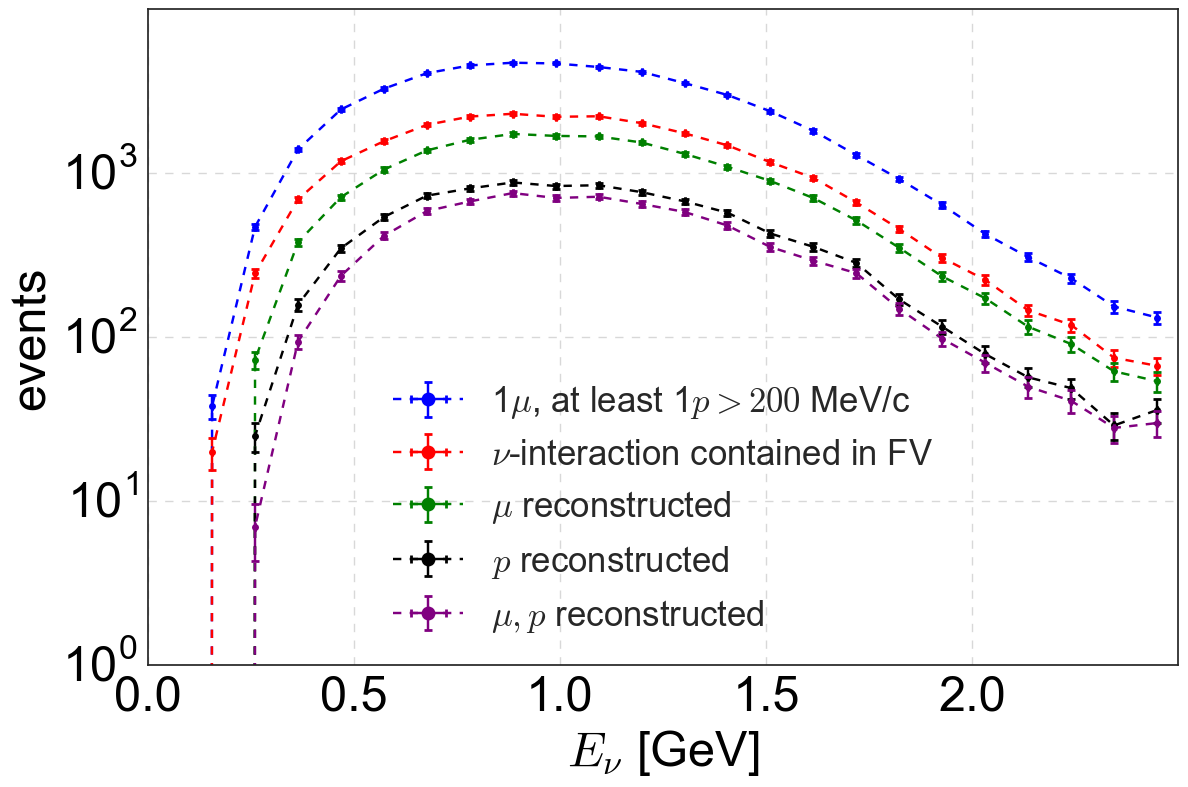

In [48]:
# fig:mupEv
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Ev'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupEv.pdf')

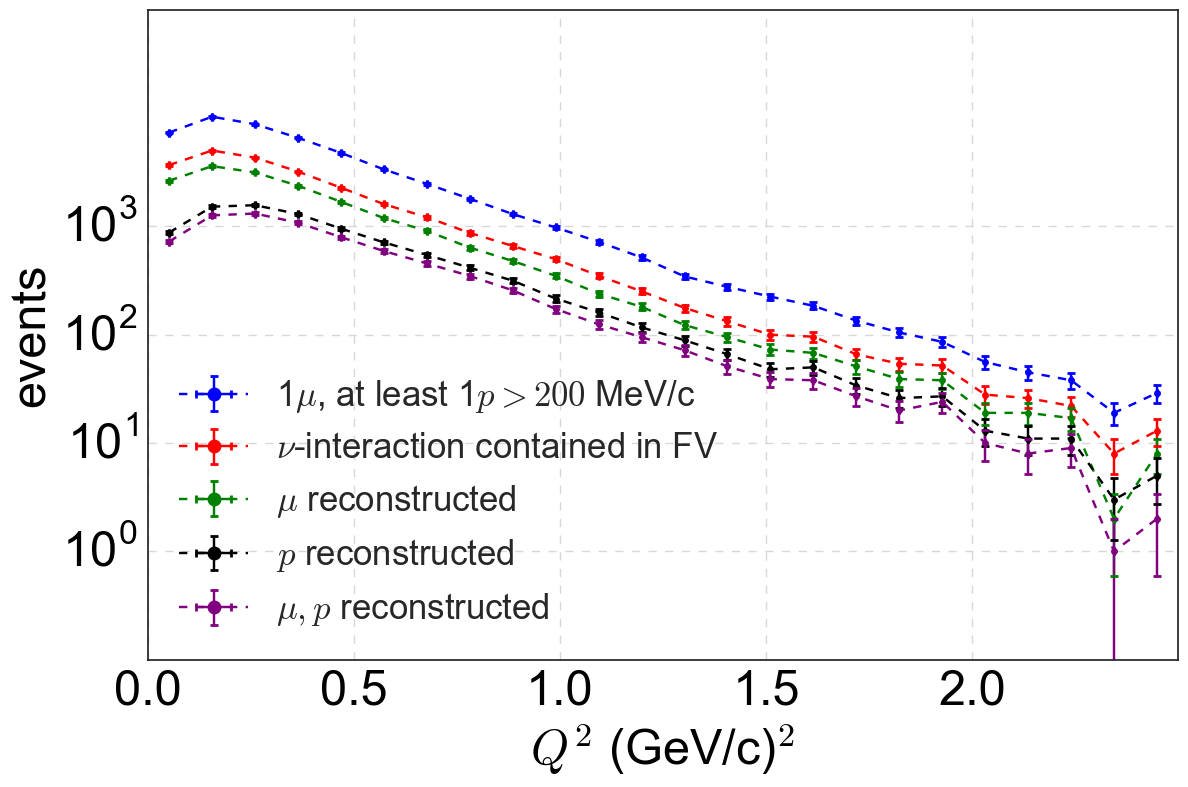

In [49]:
# fig:mupQ2
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Q2'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$Q^{2}$ (GeV/c)$^2$',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupQ2.pdf')

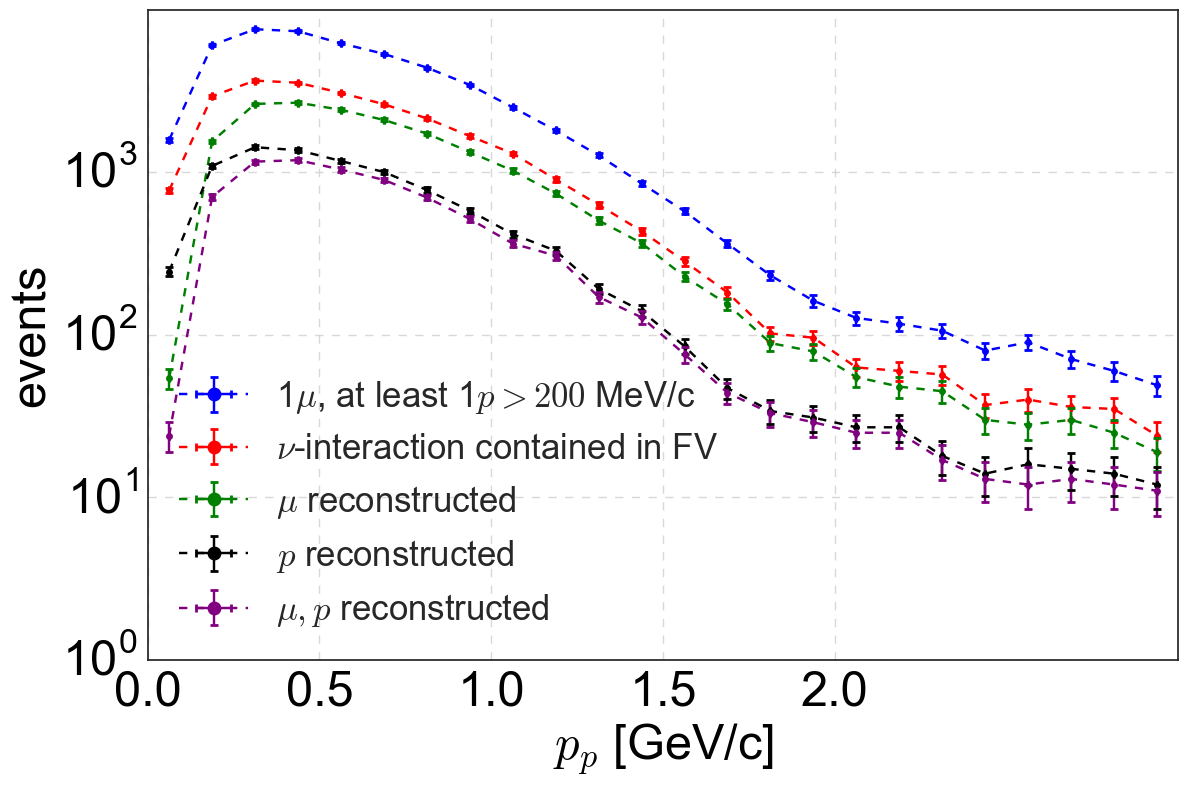

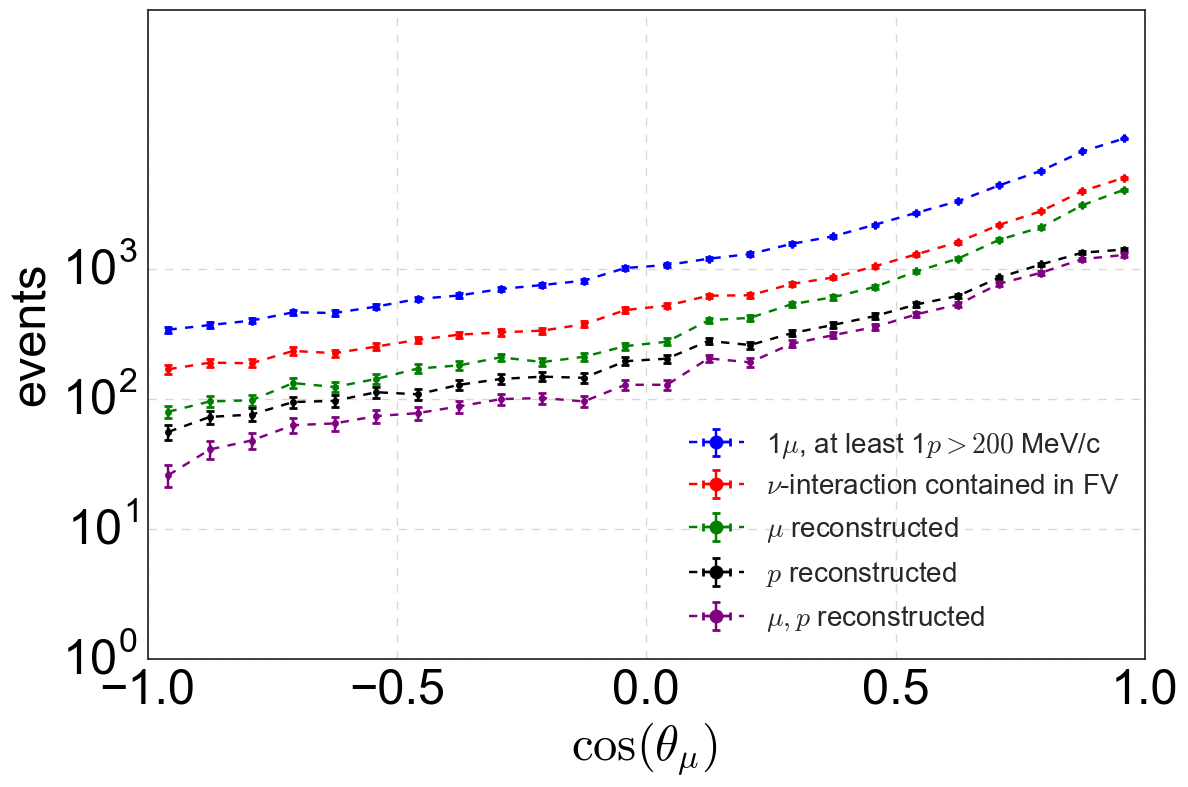

In [50]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Pmu'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$p_{p}$ [GeV/c]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum.pdf')

# fig:true_mup_cos_truth_Pmu_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(np.cos(sample['truth_Pmu_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(-1,1,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta.pdf')

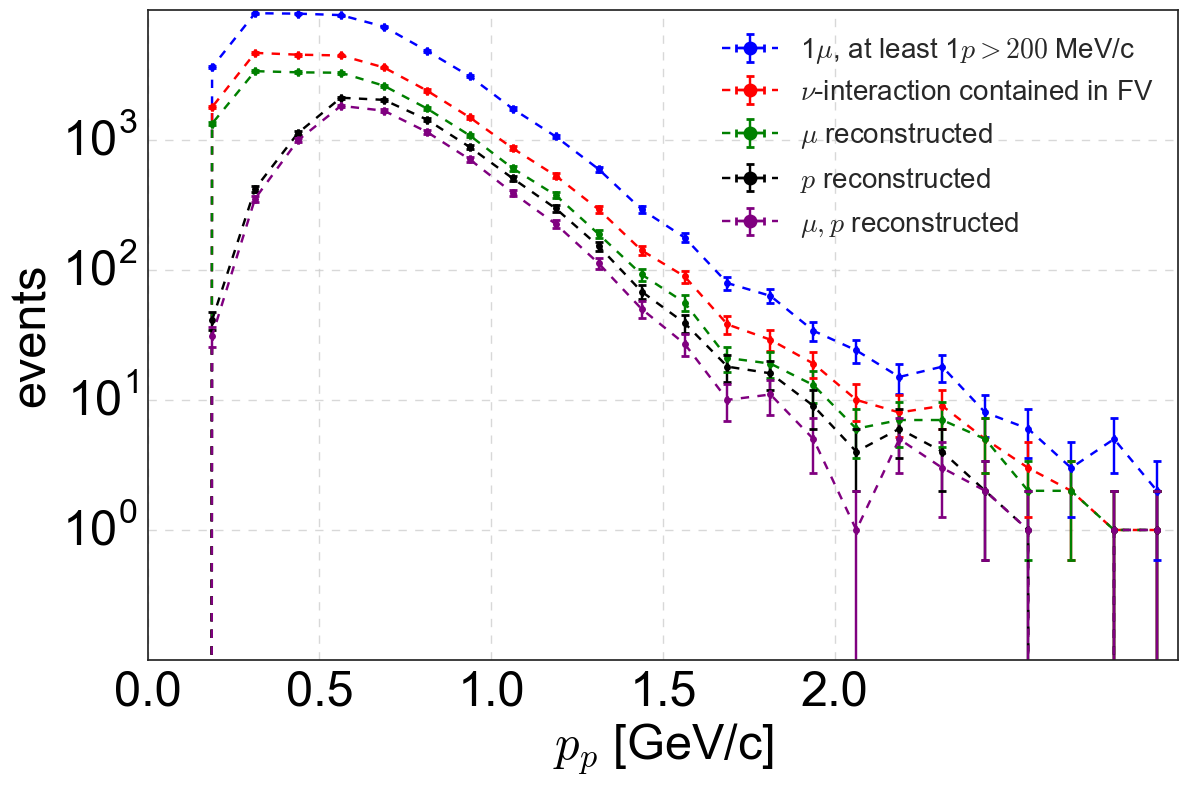

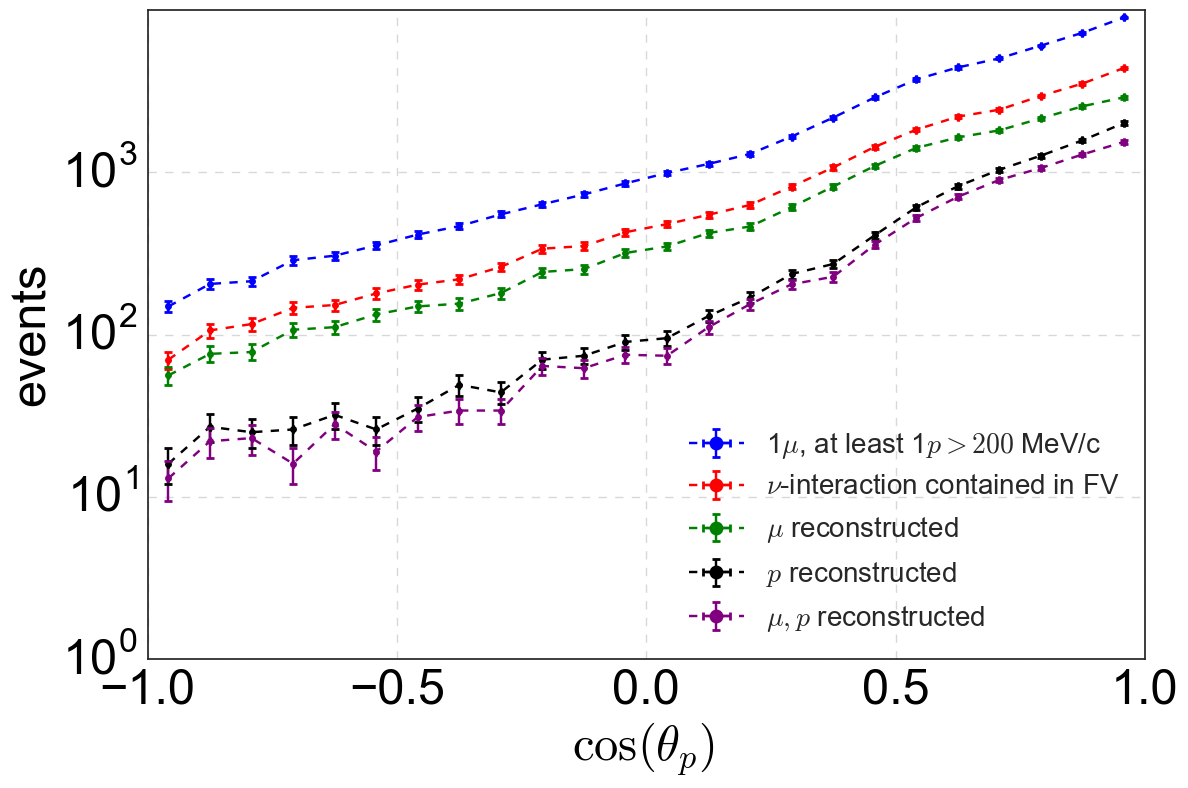

In [51]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Pp'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='upper right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$p_{p}$ [GeV/c]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum.pdf')

# fig:true_mup_cos_truth_Pp_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(np.cos(sample['truth_Pp_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$\\cos(\\theta_{p})$ ',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(-1,1,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta.pdf')

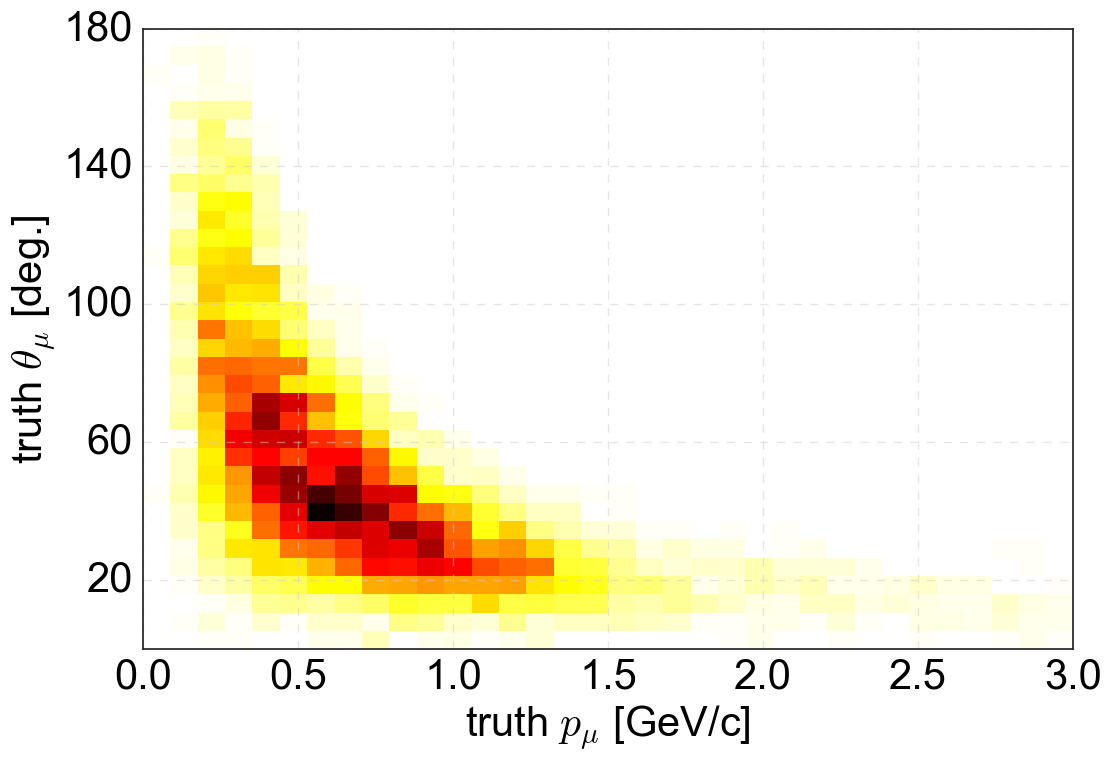

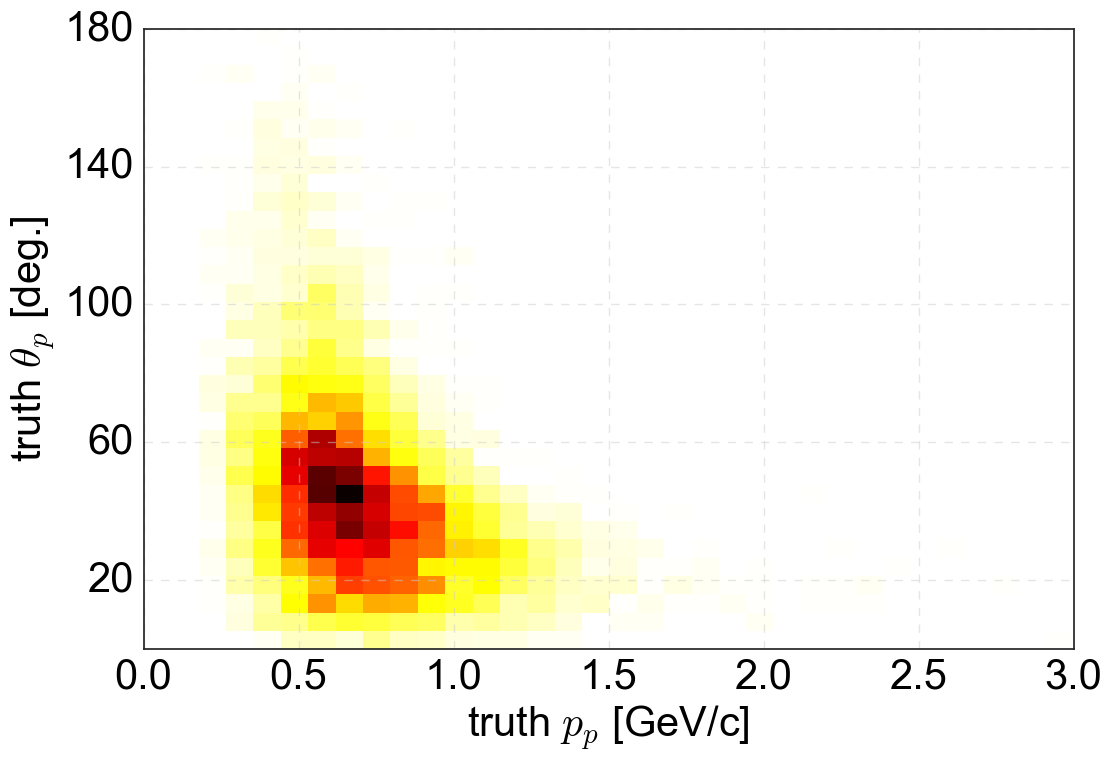

In [52]:
# fig:truth_Pmu_theta_mu
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,35),np.linspace(0,180,35))
sample=mupGENIE['IsVertexReconstructed']
plot_2d_hist(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_theta']
             ,bins=bins,ax=ax)
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{\\mu}$ [GeV/c]',y_label='truth $\\theta_{\\mu}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_mu.pdf')

# fig:truth_Pmu_theta_p
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,35),np.linspace(0,180,35))
sample=mupGENIE['IsVertexReconstructed']
plot_2d_hist(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta']
             ,bins=bins,ax=ax)
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{p}$ [GeV/c]',y_label='truth $\\theta_{p}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_p.pdf')